In [10]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

## Rankings

In [7]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'JPM', 'NFLX']
data = yf.download(tickers, start="2020-01-01", end="2024-01-01")['Adj Close']

weekly_returns = data.pct_change(periods=5).dropna()

rankings = weekly_returns.rank(axis=1, method='min')

# Metric - High ranks (underperformers) get high scores for long positions
# basically a reverse rankoing - highest rank gets highest score
scores = rankings.apply(lambda x: len(tickers) - x)
scores

[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,GOOGL,JPM,MSFT,NFLX
Date,,,,,
2020-01-09 00:00:00+00:00,1.0,0.0,4.0,3.0,2.0
2020-01-10 00:00:00+00:00,1.0,0.0,4.0,2.0,3.0
2020-01-13 00:00:00+00:00,0.0,1.0,4.0,2.0,3.0
2020-01-14 00:00:00+00:00,0.0,2.0,4.0,1.0,3.0
2020-01-15 00:00:00+00:00,0.0,1.0,4.0,2.0,3.0
...,...,...,...,...,...
2023-12-22 00:00:00+00:00,4.0,0.0,2.0,3.0,1.0
2023-12-26 00:00:00+00:00,4.0,0.0,1.0,3.0,2.0
2023-12-27 00:00:00+00:00,4.0,0.0,1.0,2.0,3.0


In [9]:
num_long = num_short = len(tickers) // 2

long_positions = scores.iloc[-1].nlargest(num_long).index  # Last row, top scores for long positions
short_positions = scores.iloc[-1].nsmallest(num_short).index  # Last row, low scores for short positions

portfolio_weights = pd.Series(0, index=tickers)

portfolio_weights[long_positions] = 1 / num_long

portfolio_weights[short_positions] = -1 / num_short

print("Long Positions:", long_positions)
print("Short Positions:", short_positions)
print("Portfolio Weights:", portfolio_weights)

Long Positions: Index(['AAPL', 'NFLX'], dtype='object', name='Ticker')
Short Positions: Index(['JPM', 'MSFT'], dtype='object', name='Ticker')
Portfolio Weights: AAPL     0.5
MSFT    -0.5
GOOGL    0.0
JPM     -0.5
NFLX     0.5
dtype: float64


/var/folders/w8/1f8bwyyx1ws53fvmw1lcp4vm0000gn/T/ipykernel_7042/2682886368.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  portfolio_weights[long_positions] = 1 / num_long


## Backtesting

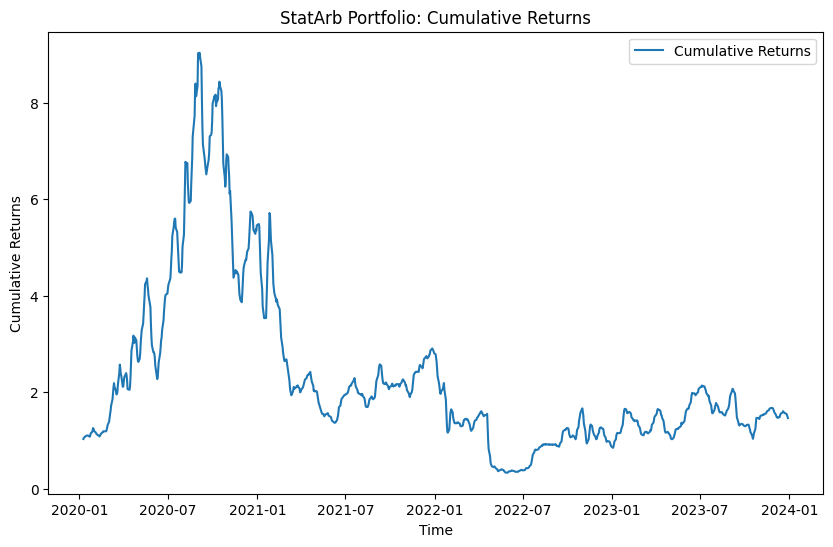

In [14]:
portfolio_returns = (portfolio_weights * weekly_returns).sum(axis=1)

cumulative_returns = (1 + portfolio_returns).cumprod()

plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label='Cumulative Returns')
plt.title('StatArb Portfolio: Cumulative Returns')
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()